# Deep Neural Network Application

## Imports

In [26]:
import numpy as np
import h5py
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
from dnn_utils import *
# from dnn_app_utils_v3 import *

In [7]:
np.random.seed(1)

## Load data

In [9]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [28]:
num_px = train_x_orig.shape[1]
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


### Reshape dataset

In [11]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## DL Model

In [13]:
n_x = train_x.shape[0] #num_px*num_px
n_y = train_y.shape[0]
n_h1 = 20
n_h2 = 7
n_h3 = 5
layers_dims = [n_x,n_h1,n_h2,n_h3,n_y]

In [16]:
def L_layer_model(X,Y,layer_dims,lr,num_iterations):
    ''' Input:  X: image pixels, of shape (num_px*num_px*3)
                Y: label vector (0 or 1), of shape (1,m)
                layer_dims: number of neurons in all layers
        Output: parameters: learnt by the model
                costs: cost in every iteration '''
    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0,num_iterations):
        AL, caches = L_model_forward(X,parameters)
        cost = compute_cost(AL,Y)
        costs.append(cost)
        grads = L_model_backward(AL,Y,caches)
        parameters = update_parameters(parameters,grads,lr)
        if i%100 == 0:
            print('Cost after iteration %i: %f '%(i,cost))
    return parameters, costs
        

In [18]:
learning_rate = 0.0075
num_iterations = 2500
parameters,costs = L_layer_model(train_x, train_y, layers_dims, learning_rate,num_iterations)

Cost after iteration 0: 0.771749 
Cost after iteration 100: 0.672053 
Cost after iteration 200: 0.648263 
Cost after iteration 300: 0.611507 
Cost after iteration 400: 0.567047 
Cost after iteration 500: 0.540138 
Cost after iteration 600: 0.527930 
Cost after iteration 700: 0.465477 
Cost after iteration 800: 0.369126 
Cost after iteration 900: 0.391747 
Cost after iteration 1000: 0.315187 
Cost after iteration 1100: 0.272700 
Cost after iteration 1200: 0.237419 
Cost after iteration 1300: 0.199601 
Cost after iteration 1400: 0.189263 
Cost after iteration 1500: 0.161189 
Cost after iteration 1600: 0.148214 
Cost after iteration 1700: 0.137775 
Cost after iteration 1800: 0.129740 
Cost after iteration 1900: 0.121225 
Cost after iteration 2000: 0.113821 
Cost after iteration 2100: 0.107839 
Cost after iteration 2200: 0.102855 
Cost after iteration 2300: 0.100897 
Cost after iteration 2400: 0.092878 


### Plot learning curve

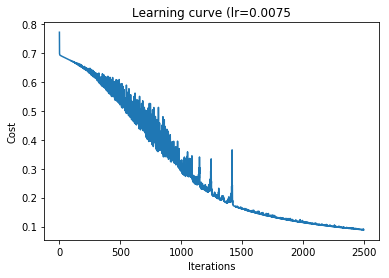

In [20]:
plt.figure()
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title('Learning curve (lr='+str(learning_rate)+') ')
plt.show()

## Predict

In [21]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.985645933014


In [22]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


### Test results

Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


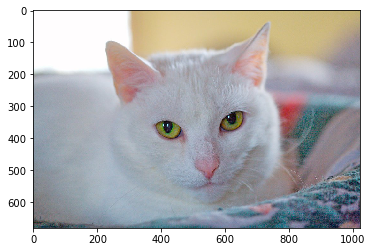

In [29]:

my_image = "my_image.jpg"
my_label_y = [1]
fname = "images/my_image.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_image = my_image/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")